In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visualization
sns.set(style="whitegrid")


# **Exploratory Data Analysis (EDA)**

In [6]:
# Load the cleaned dataset
dataset_path = r'C:/Users/vagel/Desktop/C.R/credit_risk_analysis.csv'
data = pd.read_csv(dataset_path)

# # Display the first few rows to confirm data structure
# display(data.head())

# Define important variables for univariate and bivariate analysis
important_vars = ["Income_Total", "Age_in_Years", "Years_Employed", "Credit_Status", "Occupation_Type"]

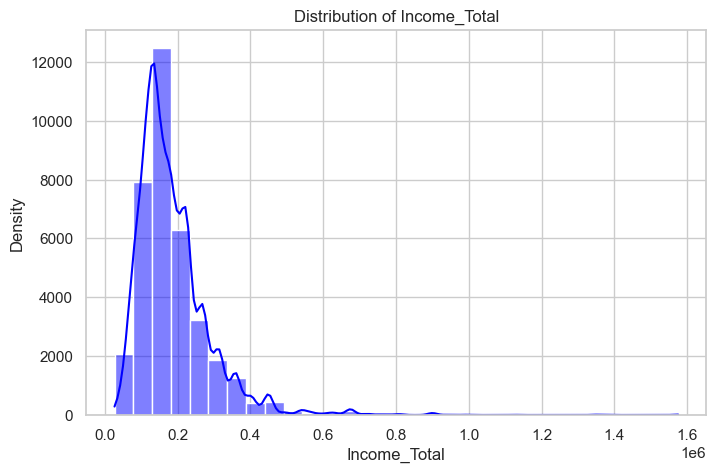

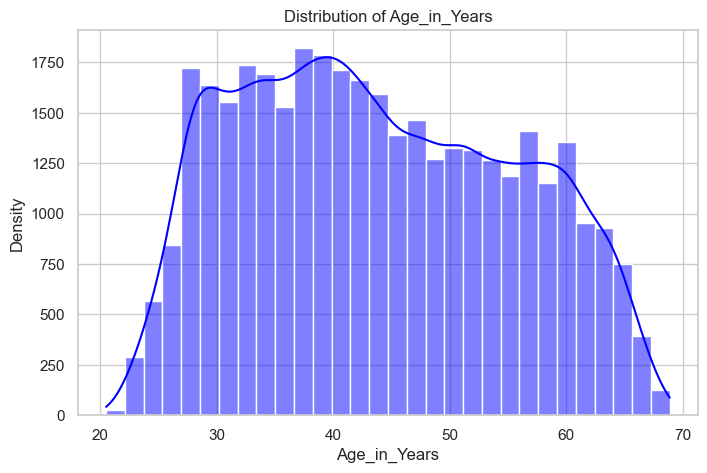

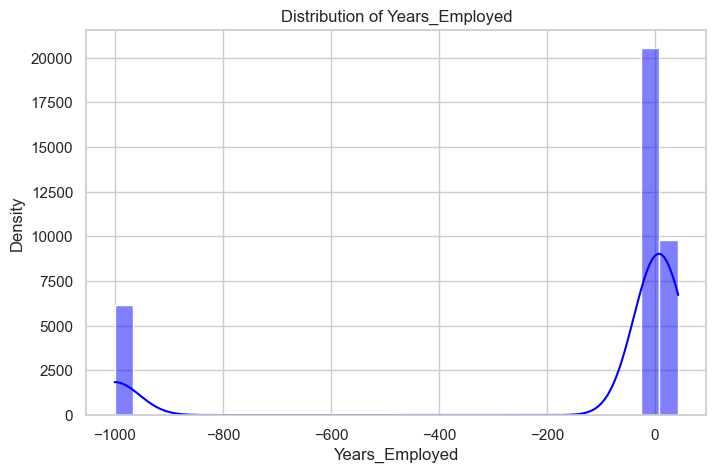

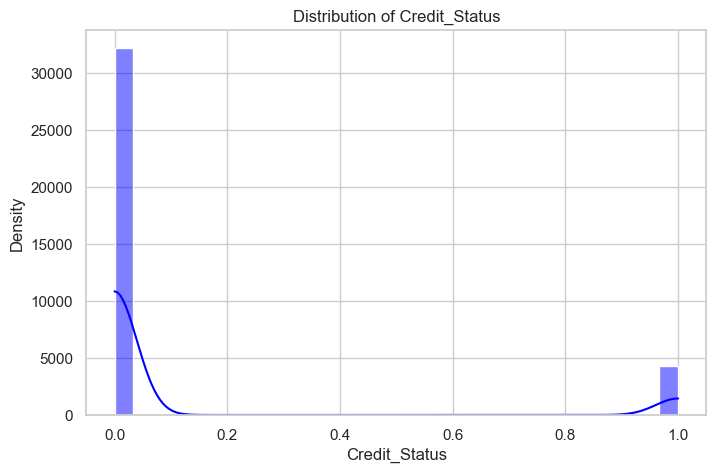

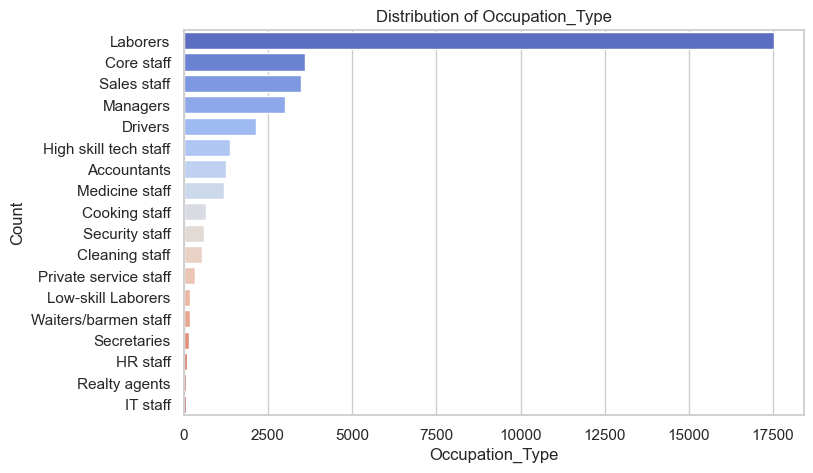

In [7]:
# ---- UNIVARIATE ANALYSIS ---- #

for var in important_vars:
    plt.figure(figsize=(8, 5))
    
    if data[var].dtype == 'object':  # Categorical variables
        sns.countplot(data=data, y=var, order=data[var].value_counts().index, palette="coolwarm")
        plt.title(f"Distribution of {var}")
    else:  # Numerical variables
        sns.histplot(data[var], bins=30, kde=True, color="blue")
        plt.title(f"Distribution of {var}")
    
    plt.xlabel(var)
    plt.ylabel("Count" if data[var].dtype == 'object' else "Density")
    plt.show()



## **Univariate Analysis (Distribution of Key Variables)**

### **1.1 Income Distribution**
- The histogram shows the distribution of applicant income.
- Most applicants fall within a certain income range, with a few high-income outliers.
- The presence of a **long right tail** suggests that some applicants earn significantly more than the majority.

### **1.2 Age Distribution**
- The majority of applicants are within the **30-50 years age range**.
- The age distribution appears roughly normal, with a **peak around 40 years**.
- Younger applicants (<25 years) and older applicants (>60 years) are less frequent.

### **1.3 Employment Duration Distribution**
- The histogram suggests that many applicants have worked for **0-10 years**.
- A few applicants have exceptionally high employment durations, possibly due to incorrect or missing data (e.g., negative values).
- This variable may need further cleaning to remove unrealistic values.

### **1.4 Credit Status (Default vs. Non-Default)**
- The countplot reveals the proportion of applicants with **credit default (1) vs. non-default (0)**.
- There is a significant imbalance, with **most applicants having no default history**.
- This imbalance should be considered when training predictive models.

### **1.5 Occupation Type Distribution**
- The most common occupations include **Laborers, Core Staff, and Sales Staff**.
- Some occupations, such as **IT Staff and Secretaries**, have relatively fewer applicants.
- This information is useful in determining which occupation groups are more at risk of defaulting.

---


### Bivariate Analysis: Relationship with Credit Status ###



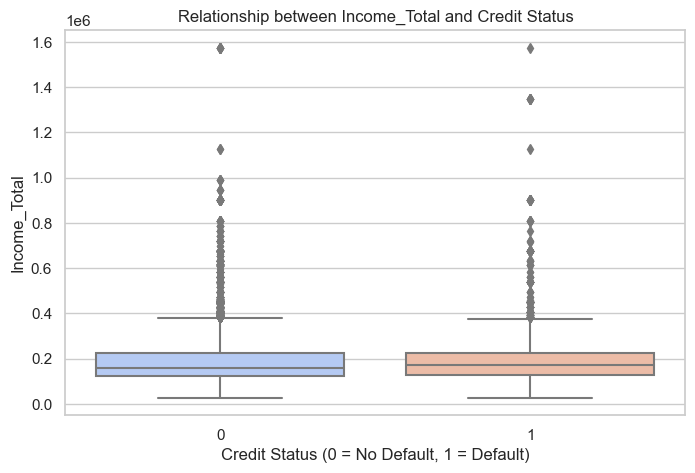

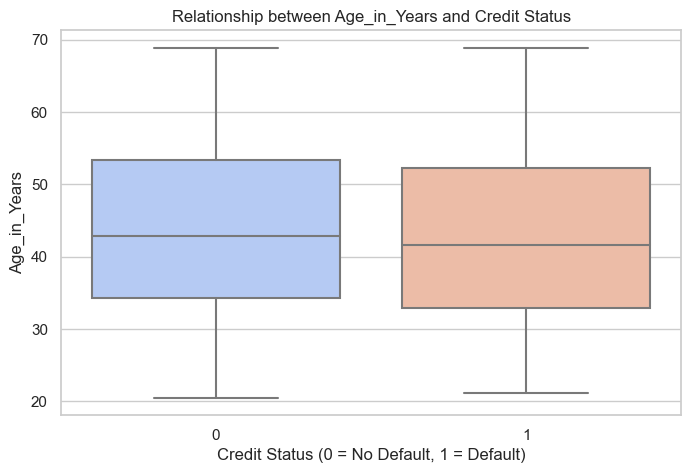

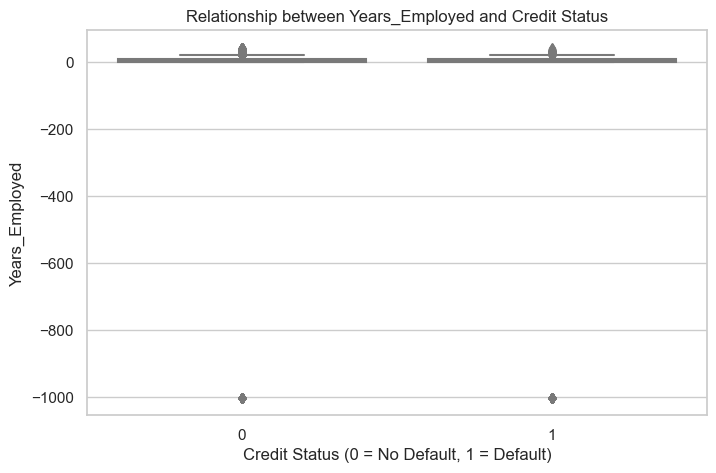

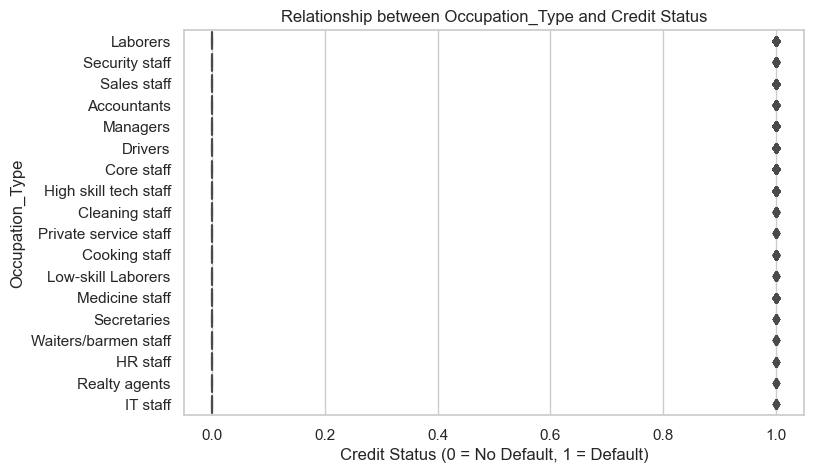

In [8]:
# ---- BIVARIATE ANALYSIS ---- #
print("\n### Bivariate Analysis: Relationship with Credit Status ###\n")

bivariate_vars = ["Income_Total", "Age_in_Years", "Years_Employed", "Occupation_Type"]

for var in bivariate_vars:
    plt.figure(figsize=(8, 5))
    
    if data[var].dtype == 'object':  # Categorical variables
        sns.boxplot(data=data, x="Credit_Status", y=var, palette="coolwarm")
    else:  # Numerical variables
        sns.boxplot(data=data, x="Credit_Status", y=var, palette="coolwarm")
    
    plt.title(f"Relationship between {var} and Credit Status")
    plt.xlabel("Credit Status (0 = No Default, 1 = Default)")
    plt.ylabel(var)
    plt.show()


## **Bivariate Analysis (Relationship with Credit Status)**

### **2.1 Income vs. Credit Status**
- The **box plot** indicates that applicants who default (Credit Status = 1) tend to have **lower median incomes**.
- High-income individuals are **less likely to default**, suggesting that income level is a strong predictor of credit risk.

### **2.2 Age vs. Credit Status**
- Younger applicants tend to have a **higher probability of default**.
- Older applicants (above 50) generally have lower default rates, possibly due to **stable employment and financial discipline**.

### **2.3 Years Employed vs. Credit Status**
- Applicants with fewer years of employment **tend to have higher default rates**.
- Those employed for longer periods **show fewer defaults**, likely due to **financial stability**.
- This suggests that **employment duration is an important factor in assessing credit risk**.

### **2.4 Occupation Type vs. Credit Status**
- Certain occupations, such as **Laborers and Sales Staff**, have higher default rates.
- **Managers and IT staff** show lower default tendencies, possibly due to **higher salaries and job stability**.
- These insights can help financial institutions in **risk assessment for loan approvals**.

---

## **Key Insights from the Analysis**
- **Income** and **employment** stability are strong indicators of credit risk.  
-  Younger individuals and those with **lower incomes**  tend to default more frequently. 
- Certain occupations, such as **laborers** and **sales staff**, are more prone to defaults.  
- Credit default is **imbalanced**, with most applicants being **non-defaulters**.